In [134]:
import pandas as pd

In [135]:
df= pd.read_csv('penguins.csv')
df


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [137]:
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [138]:
names=df['species'].value_counts().index
counts=df['species'].value_counts().values
print(names)
print(counts)

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object')
[152 124  68]


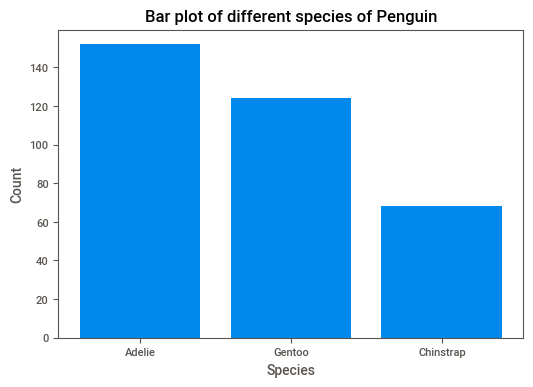

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4)) #creates a new canvas for plotting, 6inches is width and 4 inch is height. any plot we draw after this willl apear in this figure/canvas.
plt.title("Bar plot of different species of Penguin")
plt.bar(x=names,height=counts)
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('barPlot.png')
plt.show()

In [140]:
import sweetviz as sv

report = sv.analyze(df,pairwise_analysis='on')
report.show_html('analysis.html')
print("Analysis success! ")

                                             |          | [  0%]   00:00 -> (? left)

Report analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Analysis success! 


In [141]:
rows_with_na=df[df.isnull().any(axis=1)]
len(rows_with_na)
# There are 11 rows with nan values so we can drop those columns easily as 11 is only 3.19%

11

In [142]:
df.drop(rows_with_na.index,inplace=True)
df

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [143]:
df.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [144]:
X=df.drop(columns=['species','id','year'])
y=df['species']

In [145]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [146]:
X_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
200,Biscoe,44.9,13.3,213.0,5100.0,female
329,Dream,50.7,19.7,203.0,4050.0,male
269,Biscoe,48.8,16.2,222.0,6000.0,male
123,Torgersen,41.4,18.5,202.0,3875.0,male
38,Dream,37.6,19.3,181.0,3300.0,female
...,...,...,...,...,...,...
24,Biscoe,38.8,17.2,180.0,3800.0,male
325,Dream,49.8,17.3,198.0,3675.0,female
43,Dream,44.1,19.7,196.0,4400.0,male
187,Biscoe,48.4,16.3,220.0,5400.0,male


In [147]:

''' 
planning of pipeline
missing value->ohe->scaling->feture selection->model training
'''
 
#  missing values are already handled above.

' \nplanning of pipeline\nmissing value->ohe->scaling->feture selection->model training\n'

In [148]:
# ohe transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

trf1=ColumnTransformer(transformers=[
    ('ohe_island_sex',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,5])
],remainder='passthrough')



In [149]:
# scaling transformer

from sklearn.preprocessing import StandardScaler

trf2=ColumnTransformer(transformers=[
    ('scale',StandardScaler(),slice(3,7))

],remainder='passthrough')

In [150]:
#train the model

from sklearn.neighbors import KNeighborsClassifier
trf3=KNeighborsClassifier(n_neighbors=7)


### pipeline

In [151]:
from sklearn.pipeline import Pipeline


pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [152]:
# train data
pipe.fit(X_train,y_train) 

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('trf1', ...), ('trf2', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe_island_sex', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [153]:
# predict
y_pred=pipe.predict(X_test)

In [154]:

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [155]:

print("Accuracy = ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy =  1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



### cross validation using pipeline

In [156]:
#cross validation using cross_val_score

from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()
 

0.9962264150943396

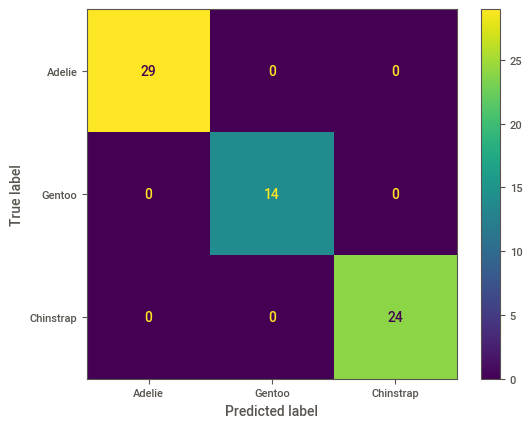

In [157]:
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=df["species"].unique())
cm_plot.plot()
plt.savefig("confusion_matrix_png")

### Grid Search using Pipeline

In [158]:
#gridSearchCv
params={
    'trf3__n_neighbors':[3,5,7,9,11]
} 
# gridSearchCv chooses the best one


In [159]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
best_pipe=grid.best_estimator_

In [160]:
best_pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('trf1', ...), ('trf2', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe_island_sex', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [161]:
import joblib

joblib.dump(pipe,'pipe.joblib')
print('success')

success
